## CDNow 网站的用户消费行为分析
数据来源 CDNow 网站的用户购买明细，通过各个指标，对用户消费行为进行分析，可以更清楚了解用户消费行为习惯，为进一步制定营销策略提供依据。

### 具体指标包括：
* 户消费趋势分析
* 用户个体消费分析
* 用户消费行为分析
* 复购率、回购率和留存率分析

### 一、理解数据
本数据集共有 6 万条左右数据，数据为 CDNow 网站 1997年1月至1998年6月的用户行为数据，共计 4 列字段:
* user_id: 用户ID
* order_dt: 购买日期
* order_products: 购买产品数
* order_amount: 购买金额

### 二、准备数据
#### 1. 导入相关库

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
plt.style.use('ggplot')  # 定义画图风格

#### 2. 加载数据

In [3]:
# 数据字段
# user_id: 用户ID
# order_dt: 购买日期
# order_products: 产品购买数
# order_amount: 购买金额

columns = [ 'user_id', 'order_dt', 'order_products', 'order_amount' ]  # 定义表头
df = pd.read_csv('CDNOW_master.txt', names=columns, sep='\s+')# 分隔符为多个空格（\s+）

#### 3. 探索数据

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [5]:
# 没有缺失值，较好的数据样本。
df.isnull().sum()

user_id           0
order_dt          0
order_products    0
order_amount      0
dtype: int64

In [6]:
# 产品购买数和消费金额的均值大于中位数，数据呈右偏分布，存在一定的极值。
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [7]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [8]:
df.tail()

,user_id,order_dt,order_products,order_amount
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12
69658,23570,19970326,2,42.96


#### 4. 预处理数据

In [9]:
# 转化为时间格式
df['order_dt'] = pd.to_datetime(df.order_dt,format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [10]:
# 新建列，按月为单位，为后续计算提供便捷
df['month'] = df.order_dt.values.astype('datetime64[M]')
df.head()

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


### 三、用户按月消费趋势分析
* 每月消费的总金额
* 每月的消费次数
* 每月的产品购买数
* 每月的消费人数


In [11]:
# 按月分组
grouped_month = df.groupby('month')

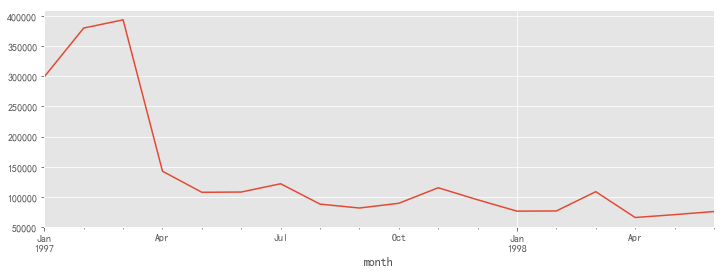

In [12]:
#（1）每月消费的总金额
grouped_month.order_amount.sum().plot(figsize=(12,4))

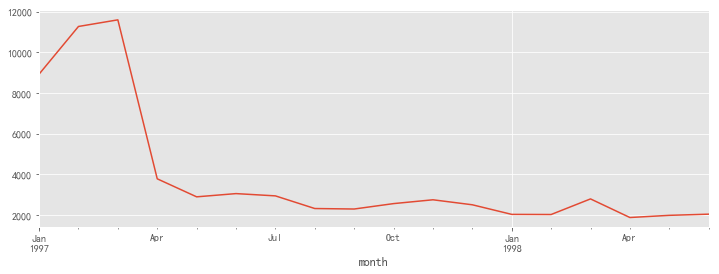

In [13]:
#（2）每月的消费次数
grouped_month.order_products.count().plot(figsize=(12,4))

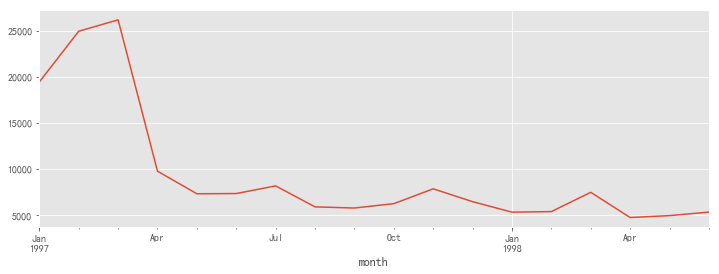

In [14]:
#（3）每月的产品购买数
grouped_month.order_products.sum().plot(figsize=(12,4))

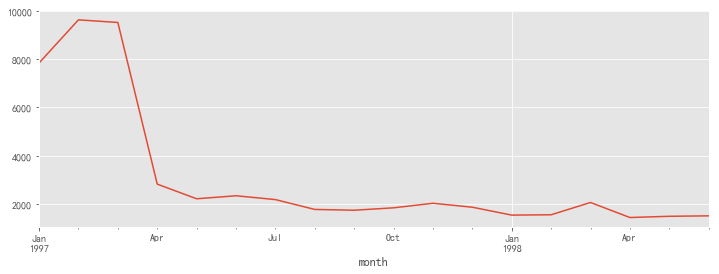

In [15]:
#（4）每月的消费人数
grouped_month.user_id.nunique().plot(figsize=(12,4))  # 同一个月中一个用户可能消费多次，需要去除掉重复的user_id

#### 由以上四图可知：
* 每月消费的总金额、消费次数、产品购买数以及消费人数，都在前三个月上升达到高峰。
* 随后在3到4月份时巨幅下降，4月份之后开始稳定上下波动，甚至有轻微下降趋势。
* 假设前三个月有促销活动，或者早期用户有异常值，但这里只有消费数据，因此不能做出判断。

### 四、用户个体消费分析
* 用户消费金额、产品购买数的描述统计
* 用户消费金额与产品购买数的散点图
* 用户消费金额的分布图
* 用户产品购买数的分布图
* 用户累计消费金额占比

In [16]:
# 按用户分组
grouped_user=df.groupby("user_id")

In [17]:
#（1）用户消费金额、产品购买数的描述统计
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


#### 由上表可知：
* 用户平均每个人购买7张，中位数是3，且有狂热用户购买了1033张。平均值大于中位数，是右偏分布，说明存在小部分用户购买大量CD。
* 用户平均消费106元，中位数是43，且有土豪用户消费了13990元，结合分位数和最大值看，平均数仅和75%分位接近，说明存在小部分高消费用户。

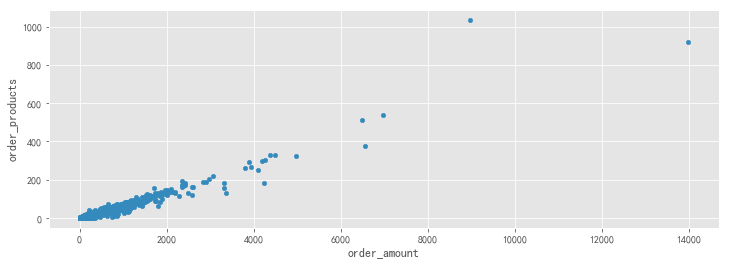

In [18]:
#（2）用户消费金额与产品购买数的散点图
grouped_user.sum().plot.scatter(x='order_amount',y='order_products',figsize=(12,4))

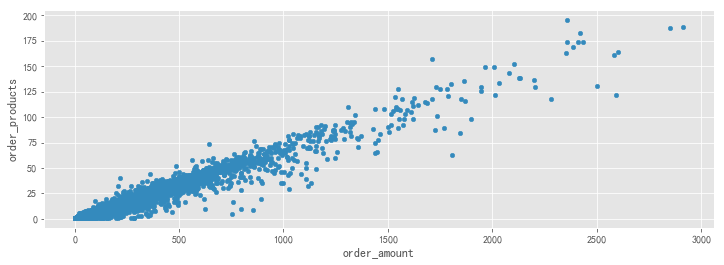

In [19]:
#（2）用户消费金额和产品购买数的散点图 (由于散点图对极值比较敏感，可以做简单的过滤，聚焦到数据集中的范围)
grouped_user.sum().query('order_amount<3000').query('order_products<200').plot.scatter(x='order_amount',y='order_products',figsize=(12,4))

#### 由上图可以更加清晰地看到，绝大部分的数据集中在order_amount小于1000，order_products小于100的范围之内。

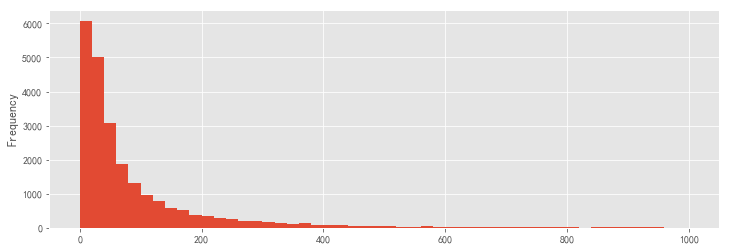

In [20]:
#（3）用户消费金额的分布图（根据上面散点图，选择数据较为集中的部分进行分析。)
grouped_user.sum().query('order_amount<1000').order_amount.plot.hist(bins=50,figsize=(12,4))

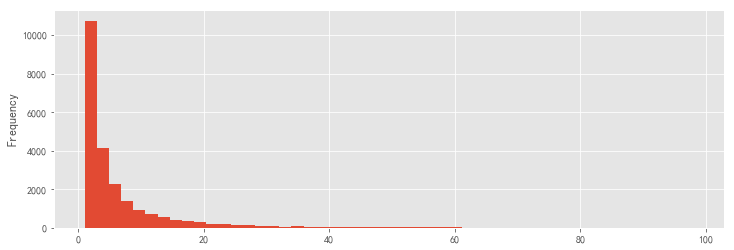

In [21]:
#（4）用户消费产品购买数的分布图（根据上面散点图，选择数据较为集中的部分进行分析）
grouped_user.sum().query('order_products<100').order_products.plot.hist(bins=50,figsize=(12,4))

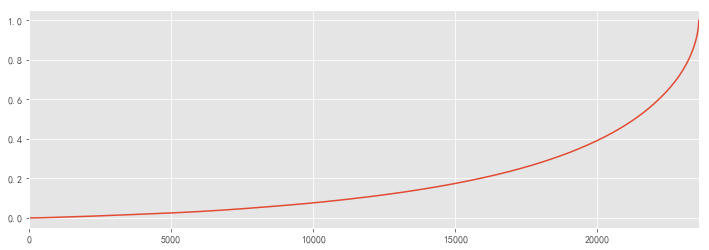

In [22]:
#（5）用户累计消费金额占比：按用户消费金额进行升序排列，再利用cumsum()计算轴向元素累加和，再除以sum，得到累计比例。
user_cumsum=grouped_user.sum().sort_values('order_amount').apply(lambda x:x.cumsum()/x.sum())
user_cumsum.reset_index().order_amount.plot(figsize=(12,4))

#### 由上图可知，用户消费行为基本符合二八定律，80% 的用户贡献了 25% 的消费金额，而 60% 的消费由排名最后 5000 名用户贡献。

### 五、用户消费行为分析
* 用户第一次消费（首购）
* 用户最后一次消费
* 新老客户消费比：
  * 仅消费了一次的用户
  * 每月新客占比
* 用户分层：
  * RFM
  * 新、活跃、回流、流失
* 用户购买周期（按订单）
  * 用户消费周期描述
  * 用户消费周期分布
* 用户生命周期（按第一次&最后一次消费）
  * 用户生命周期描述
  * 用户生命周期分布

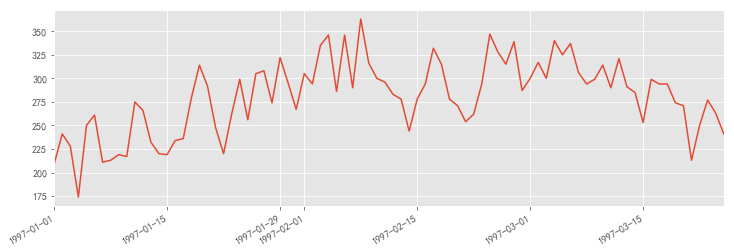

In [23]:
#（1）用户第一次消费（首购）
grouped_user.order_dt.min().value_counts().plot(figsize=(12,4))

#### 由上图可知：
* 所有用户的首购都集中在97年1月1日至97年3月29日，2月上旬以前首购客户数量一直稳定上升。
* 在2月10日左右首购客户的数量产生剧烈波动，在2月下旬开始稳定，然后一直到3月下旬都呈现稳定下跌的状态。

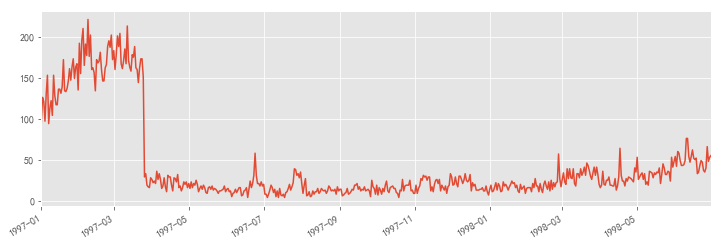

In [24]:
#（2）用户最后一次消费
grouped_user.order_dt.max().value_counts().plot(figsize=(12,4))

#### 由上图可知：
* 用户最后一次购买的分布比第一次分布广，大部分最后一次购买集中在前三个月，说明有很多用户购买了第一次之后就不再购买了。
* 而且随着时间的递增，最后一次购买也在递增，说明消费呈现流失上升的状况。

([<matplotlib.patches.Wedge at 0x20497c6e978>,
 [Text(-1.0998521759630362, -0.018033053800576255, '只消费一次用户'),
  Text(1.249832018139814, 0.020492106591563773, '多次消费用户')],
 [Text(-0.5999193687071106, -0.009836211163950682, '50.5%'),
  Text(0.7498992108838882, 0.012295263954938261, '49.5%')])

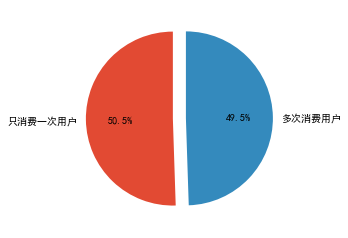

In [25]:
#（3）新老客户消费比
# ① 有多少客户只消费了一次？
labels = ['只消费一次用户','多次消费用户']
rate = (grouped_user.order_dt.count()==1).value_counts()
plt.pie(rate,labels=labels,explode=(0,0.15),autopct='%2.1f%%',startangle=90,)

In [26]:
#（3）新老客户消费比
# ② 每月新客占比
user_life=grouped_user.order_dt.agg(['min']).sort_values('min')  # 新建一个dataframe，user_life，以min为首购日期。
user_life['month']=user_life['min'].values.astype('datetime64[M]')  # 在user_life那里添加一列month，也是首购日期，不过是以月为单位
user_life.groupby('month').month.describe()

,count,unique,top,freq,first,last
month,,,,,,
1997-01-01,7846,1,1997-01-01 00:00:00,7846,1997-01-01 00:00:00,1997-01-01 00:00:00
1997-02-01,8476,1,1997-02-01 00:00:00,8476,1997-02-01 00:00:00,1997-02-01 00:00:00
1997-03-01,7248,1,1997-03-01 00:00:00,7248,1997-03-01 00:00:00,1997-03-01 00:00:00


#### 由上表可知每个月份的首购客户数量:
* 1月份新客占比：7846/(7846+8476+7248)=33.29%
* 2月份新客占比：8476/(7846+8476+7248)=35.96%
* 3月份新客占比：7248/(7846+8476+7248)=30.75%

In [27]:
#（4）用户分层
# ①RFM模型分析（最近一次消费、消费频率、消费金额）
rfm=df.pivot_table(index='user_id', 
                   values=['order_dt', 'order_amount', 'order_products'], 
                   aggfunc={'order_dt':'max', 'order_amount':'sum', 'order_products':'count'})
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,2
3,156.46,1998-05-28,6
4,100.50,1997-12-12,4
5,385.61,1998-01-03,11


In [28]:
# R，Recency，计算最近一次消费距离至今多少天（因为数据比较久远，所以用order_dt里面最大的一项作为今天）
rfm["R"]=(rfm.order_dt.max()-rfm.order_dt)/np.timedelta64(1,'D')

In [29]:
# F，Frequency，消费频率；
# M，Monetary，消费总金额。
rfm=rfm.rename(columns={'order_products':'F','order_amount':'M'})

In [30]:
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>=0 else '0')
    label=level.R+level.F+level.M
    d={ '111' : '重要价值客户',
        '011' : '重要保持客户',
        '101' : '重要挽留客户',
        '001' : '重要发展客户',
        '110' : '一般价值客户',
        '010' : '一般保持客户',
        '100' : '一般挽留客户',
        '000' : '一般发展客户'}
    result = d[label]
    return result

In [31]:
# 把按照r、f、m这三个维度取平均，每个维度都把高于平均值的标记为1，低于平均值得标记为0.
rfm['label']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head(10)

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户
2,89.00,1997-01-12,2,534.0,一般挽留客户
3,156.46,1998-05-28,6,33.0,重要保持客户
4,100.50,1997-12-12,4,200.0,一般保持客户
5,385.61,1998-01-03,11,178.0,重要保持客户
6,20.99,1997-01-01,1,545.0,一般挽留客户
7,264.67,1998-03-22,3,100.0,重要保持客户
8,197.66,1998-03-29,8,93.0,重要保持客户
9,95.85,1998-06-08,3,22.0,一般保持客户


In [32]:
# 不同维度客户的占比
rfm_grouped=rfm.groupby('label') 
rfm_grouped.sum()

,M,F,R
label,,,
一般价值客户,36200.21,1782,237754.0
一般保持客户,141127.20,7371,309037.0
一般发展客户,75781.48,3064,311519.0
一般挽留客户,409272.88,15589,6750356.0
重要价值客户,103260.14,1950,194091.0
重要保持客户,1591666.47,38490,517048.0
重要发展客户,46158.16,536,56855.0
重要挽留客户,96849.09,877,278754.0


In [33]:
# 不同客户的总数
pd.Series(rfm_grouped['label'].count(),name='series')

label
一般价值客户      543
一般保持客户     1974
一般发展客户     1532
一般挽留客户    13608
重要价值客户      449
重要保持客户     4617
重要发展客户      268
重要挽留客户      579
Name: series, dtype: int64

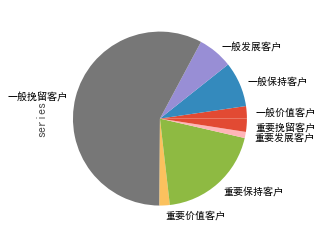

In [34]:
# 做出饼图，从RFM模型分层可知，本数据集的大部分用户为一般挽留客户，其次是重要保持客户
pd.Series(rfm_grouped['label'].count(),name='series').plot.pie(figsize=(12,4))

In [35]:
#（4）用户分层
# ② 用户生命周期：新人、活跃、回流、流失
# 新人：首次消费在最新时间。
# 活跃：持续消费。
# 回流：曾今有过消费，隔了超过一个月后再次消费。
# 流失：曾今有过消费，到最新时间为止还没有消费过。

In [36]:
# 使用数据透视，将每个用户每月消费次数计算出来
# 没有消费次数的话，需要 fillna(0) 把 NaN 变成 0。
pivoted_counts = df.pivot_table(index='user_id', columns='month', values='order_dt', aggfunc='count').fillna(0)
pivoted_counts.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# 由于本次分析是计算每个月是否有消费，具体消费多少次不重要，因此可以把大于0的都当做1:
purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)

In [38]:
# 由于很多的首次消费是在2月或者3月，所以在写函数判断的时候需要考虑在内，并不是所有的首次消费都在一月
def active_status(data):
    status=[]
    for i in range(18):  #共18个月
        
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
                
        #若本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1] =='unactive':
                    status.append('return')
                elif status[i-1]=='unreg':
                    status.append('new')
                else:
                    status.append('active')
                    
    return status

In [39]:
# 函数的逻辑：

# 若本月没有消费：
# 若之前是未注册，则依旧为未注册。
# 若之前有消费，则为流失。
# 其他情况，视为未注册。

# 若本月有消费：
# 若是第一次消费，则是新用户。
# 如果之前有过消费，且上个月为不活跃，则为回流。
# 如果上个月为未注册，则为新用户。
# 除此之外，为活跃。

In [40]:
indexs=df['month'].sort_values().astype('str').unique()
purchase_sta=purchase.apply(lambda x:pd.Series(active_status(x),index=indexs),axis=1)
purchase_sta.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [41]:
# 把 unreg 替换成 NaN，再用 fillna(0) 把 NaN 填为 0，最后转置。
# 把月份作为索引行，状态作为列。
purchase_sta.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T

,active,new,return,unactive
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0
1997-10-01,532.0,0.0,1307.0,21731.0


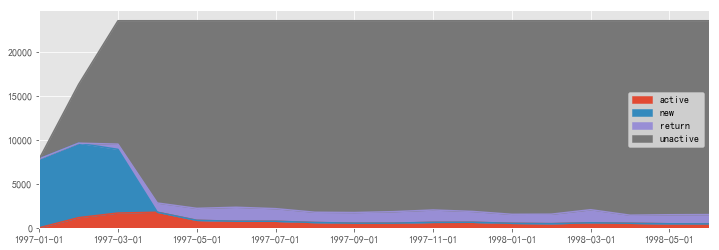

In [42]:
# 作出非堆积效果图
purchase_sta.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T.plot.area(figsize=(12,4))

#### 由上图可知：
* 到了在前三个月，新用户增加的数量非常大。
* 从三月一号开始，用户开始快速流失，到后面的几个月流失用户基本占绝大比例。

In [43]:
#（5）用户购买周期（按订单）
# ① 不同用户每次消费相隔多少时间
order_diff=grouped_user.apply(lambda x:x.order_dt-x.order_dt.shift())
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

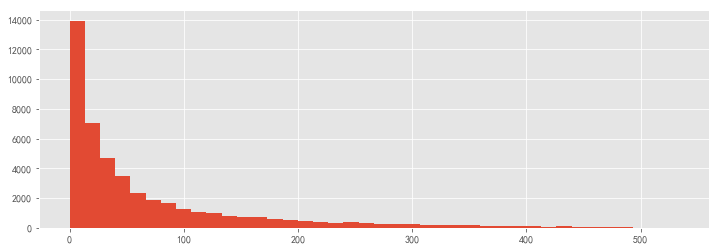

In [44]:
#（5）用户购买周期（按订单）
# ② 每次消费相隔时间大致的分布
(order_diff/np.timedelta64(1,'D')).hist(bins=40,figsize=(12,4))

#### 由上图以及描述可知：
* 订单周期呈指数分布。
* 用户的平均购买周期是68天。
* 绝大部分用户的购买周期都低于100天。

In [45]:
#（6）用户生命周期
# ① 用户消费周期描述
user_life = grouped_user.order_dt.agg(['min', 'max'])
(user_life['max'] - user_life['min']).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

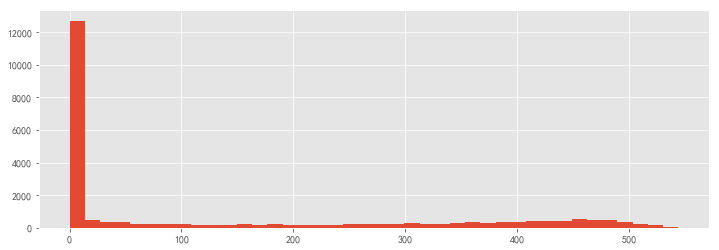

In [46]:
#（6）用户生命周期
# ② 用户消费周期分布
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=40,figsize=(12,4))

#### 由上图可知，用户的生命周期受只购买一次的用户影响比较厉害（可以排除），用户均消费134天，中位数仅0天。

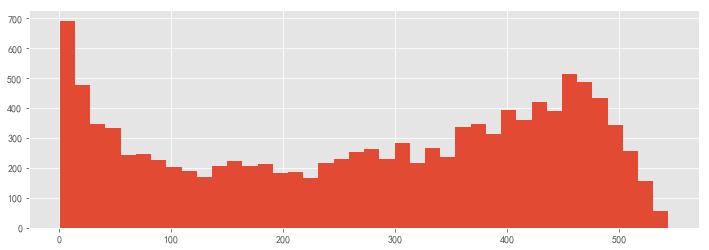

In [47]:
#（6）用户生命周期
# ② 用户消费周期分布

# 过滤掉lifetime > 0,即排除了仅消费一次的客户和一些生命周期在0天的两次消费的用户。
u_l = (user_life['max'] - user_life['min'])/np.timedelta64(1,'D')
u_l[u_l > 0].hist(bins=40,figsize=(12,4))

#### 由上图可知，少部分用户集中在50-300天，属于普通型生命周期；高质量用户体现在生命周期400天以后的用户，这部分用户属于忠诚用户。

In [48]:
# 消费两次以上用户平均生命周期
# 消费两次以上的用户平均生命周期是 276 天，远高于总体 134 天，所以如何在用户首次消费后引导其进行多次消费，可以有效提高用户生命周期。
u_l[u_l > 0].mean()

276.0448072247308

### 六、复购率、回购率和留存率分析
* 复购率
* 回购率
* 留存率

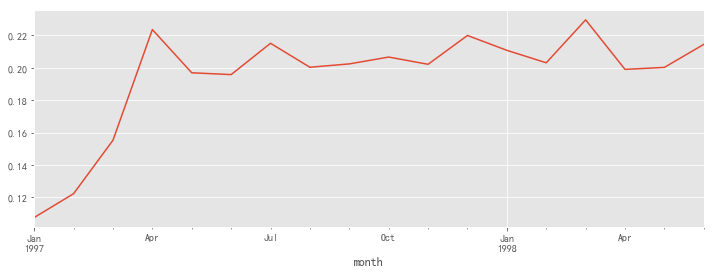

In [49]:
#（1）复购率：当月多次购买（超过一次）
# "1"表示消费次数大于1；"0"表示只消费过一次；"NaN"表示没买过，在count中就不会计算在名额内。
# # 复购率 = 消费次数大于1的 / 只消费过一次的，求复购率就计算消费次数大于1的占比。
purchase_r=pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x == 0 else 0)
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,4))

In [50]:
#（2）回购率：上个月有过消费，这个月又有消费，就叫回购。
def purchase_back(data):
    status=[]
    for i in range(17):
        
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NaN)
            
    status.append(np.NaN) 
    return status  

In [51]:
# 1代表本月有消费，下个月也有消费；0代表本月有消费，但是下个月没有消费；NaN代表连续两月没有消费。
purchase_b=purchase.apply(lambda x:pd.Series(purchase_back(x),index=indexs),axis=1)
purchase_b.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


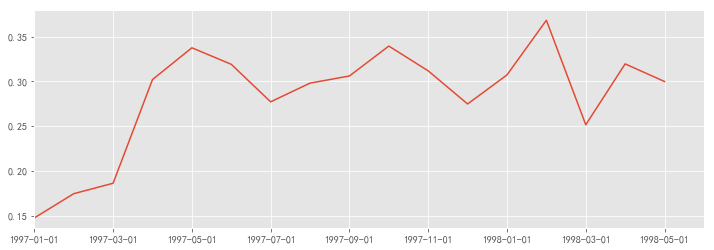

In [52]:
# 回购率 = 本月与次月都有消费的 / 本月有消费的
(purchase_b.sum()/purchase_b.count()).plot(figsize=(12,4))

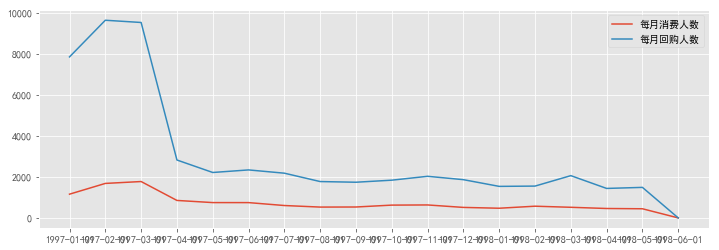

In [53]:
# 作出折线复合图
plt.figure(figsize=(12,4))
plt.plot(purchase_b.sum(),label='每月消费人数',)
plt.plot(purchase_b.count(),label='每月回购人数')
plt.legend()

#### 由以上三图可知：
* 复购率在前三个月高速增长，最终在大概四月份的时候稳定在20%左右。
* 回购率在前三个月快速增长，知道四月份增长到30%以后，一直维持在30%左右波动。
* 回购人数在前三月之后趋于稳定，波动产生的原因可能营销淡旺季导致。
* 结合回购率和复购率分析，新客的整体忠诚度低于老客，老客的回购率较好，消费频率稍低。

In [54]:
#（3）留存率分析
# 每一次消费距第一次消费的时间差值
user_purchase = df[['user_id','order_products','order_amount','order_dt']]
user_purchase_retention = pd.merge(left = user_purchase,
                                   right = user_life['min'].reset_index(),
                                   how = 'inner',
                                   on = 'user_id')
user_purchase_retention['order_dt_diff'] = user_purchase_retention['order_dt']-user_purchase_retention['min']
user_purchase_retention['dt_diff'] = user_purchase_retention.order_dt_diff.apply(lambda x: x/np.timedelta64(1,'D'))

user_purchase_retention.head()

,user_id,order_products,order_amount,order_dt,min,order_dt_diff,dt_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0


In [55]:
# 时间差值分桶
bin=[0,3,7,15,30,60,90,180,365]
user_purchase_retention['dt_diff_bin'] = pd.cut(user_purchase_retention.dt_diff, bins = bin)
user_purchase_retention['order_dt_diff'] = user_purchase_retention['order_dt'] - user_purchase_retention['min']
pivoted_retention = user_purchase_retention.groupby(['user_id','dt_diff_bin']).order_amount.sum().unstack()
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x >0 else 0)
pivoted_retention.mean()

dt_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

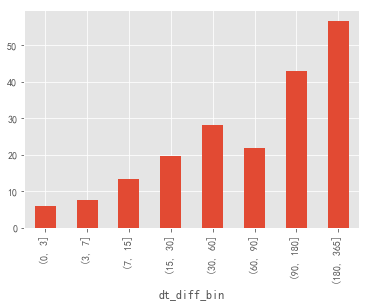

In [56]:
((pivoted_retention_trans.sum()/pivoted_retention_trans.count())*100).plot.bar()

#### 综上所述：
* 从运营角度看，与拉新相比，更应该注重用户忠诚度的培养，如果有活动，最好放在前三个月。
* 结合用户生命周期与和留存率，用户平均消费时间间隔为 68 天，所以召回用户最好在 60 左右的时间间隔
* 不妨将时间召回点设为消费后立即赠送优惠券，消费后10天询问用户CD怎么样，消费后30天提醒优惠券到期，消费后60天短信推送。